<h3 style="color:red;">Preterm neonate of 31 weeks of gestation and 1.5 kg at 48 hours</h3>

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 18.6 sec. Average model step in 0.0258 ms.
Heart.heart_rate: max   137.8544 min   135.3126
AA.pres         : max   54.84758, min   29.96025 mmHg
LA_LV.flow      : net  303.74388, forward  303.74388, backward        0.0 ml/kg/min, stroke volume:    2.21709 ml/kg, 
RA_RV.flow      : net  295.86744, forward  295.86744, backward        0.0 ml/kg/min, stroke volume:     2.1596 ml/kg, 
SVC_RA.flow     : net  130.62023, forward  145.60466, backward  -14.98443 ml/kg/min, stroke volume:    0.95342 ml/kg, 
AAR_AD.flow     : net  170.99151, forward  174.90515, backward   -3.91364 ml/kg/min, stroke volume:     1.2481 ml/kg, 
LV.vol          : max    3.10828, min    0.80163 ml/kg


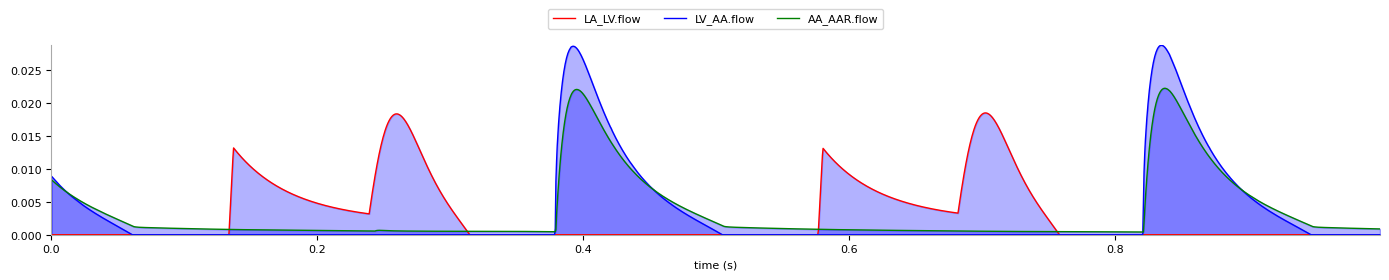

LA_LV.flow      : net   175.3026, forward   175.3026, backward        0.0 ml/min, stroke volume:    1.46012 ml, 
LV_AA.flow      : net  190.82808, forward  190.82808, backward        0.0 ml/min, stroke volume:    1.58944 ml, 
AA_AAR.flow     : net  195.54839, forward  195.54839, backward        0.0 ml/min, stroke volume:    1.62876 ml, 


{'heartrate': 135.57450068550455,
 'spo2_pre': 96.22882479901016,
 'spo2_post': 95.97745009235186,
 'abp_systole': 54.94133,
 'abp_diastole': 30.1015,
 'pap_systole': 33.22751,
 'pap_diastole': 11.45689,
 'cvp': 1.283615454,
 'resp_rate': 42.70472605111778,
 'pH': 7.384149105204216,
 'po2': 10.482764522303187,
 'pco2': 5.878610593374767,
 'hco3': 26.02000794583696,
 'be': 0.4131404668002573}

In [6]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# scale the model to a premature neonate of 24 weeks and 0.65 kg (p50 Fenton growth charts)
# blood volume according to gestational age: blood_volume = -1.4 * gest_age + 133.6     (24 weeks = 100 ml/kg and 42 weeks = 75 ml/kg)
# res and el_min relation with gest_age: factor = 0.0285 * gest_age - 0.085
# el_base and el_max relation with gest_age: factor = 0.014 * gest_age + 0.46

gest_age = 24.0

blood_volume = -1.4 * gest_age + 123.6
res_factor = 0.0285 * gest_age - 0.085
el_base_factor = 0.014 * gest_age + 0.46
el_min_factor = 0.0285 * gest_age - 0.085
el_max_factor = 0.014 * gest_age + 0.46

model._scaling.res_factor_circ_correction = res_factor
model._scaling.el_base_factor_circ_correction = el_base_factor
model._scaling.el_min_factor_correction = el_min_factor
model._scaling.el_max_factor_correction = el_max_factor


model._scaling.scale_patient(
    gest_age=gest_age,
    postnatal_age=2.0,
    weight=0.65,
    height=0.309,
    blood_volume=blood_volume / 1000.0,
    lung_volume=0.03,
    hr_ref=160.0,
    map=34.62,
)


# stabilize the model by calculating 60 seconds
neo.calculate(360)

# get the validation data
neo.validate()
neo.plot_time_graph(
    ["LA_LV.flow", "LV_AA.flow", "AA_AAR.flow"],
    sampleinterval=0.0005,
    time_to_calculate=1.0,
)
neo.get_vitals()

<h5 style="color:red;">Model run results</h5>

In [5]:
neo.calculate(60)
neo.validate()
neo.get_vitals()

 Ready in 3.9 sec. Average model step in 0.0325 ms.
Heart.heart_rate: max   138.9708 min  137.22424
AA.pres         : max   54.55911, min   30.43392 mmHg
LA_LV.flow      : net  301.43653, forward  301.43653, backward        0.0 ml/kg/min, stroke volume:     2.1843 ml/kg, 
RA_RV.flow      : net   294.6926, forward   294.6926, backward        0.0 ml/kg/min, stroke volume:    2.13544 ml/kg, 
SVC_RA.flow     : net  128.90985, forward  142.69856, backward  -13.78871 ml/kg/min, stroke volume:    0.93412 ml/kg, 
AAR_AD.flow     : net  169.41138, forward  173.40258, backward    -3.9912 ml/kg/min, stroke volume:    1.22761 ml/kg, 
LV.vol          : max    3.13177, min    0.88444 ml/kg


{'heartrate': 137.65064114046106,
 'spo2_pre': 95.00369086919854,
 'spo2_post': 94.58189418202319,
 'abp_systole': 54.16458,
 'abp_diastole': 30.79996,
 'pap_systole': 34.78109,
 'pap_diastole': 14.49344,
 'cvp': 2.279657144,
 'resp_rate': 46.489892102137986,
 'pH': 7.318595210964784,
 'po2': 9.93634968974207,
 'pco2': 6.900743722691283,
 'hco3': 26.264838621405634,
 'be': -0.7832183198894362}

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>